# 모델 저장

- 학습한 모델을 저장장치에 파일로 저장하고 나중에 불러와 사용(추가 학습, 예측 서비스) 할 수 있도록 한다. 
- 파이토치는 모델의 파라미터만 저장하는 방법과 모델 구조와 파라미터 모두를 저장하는 두가지 방식을 제공한다.
- 저장 함수
    - `torch.save(저장할 객체, 저장경로)`
- 보통 저장파일의 확장자는 `pt`나 `pth` 를 지정한다.

## 모델 전체 저장하기 및 불러오기

- 저장하기
    - `torch.save(model, 저장경로)`
- 불러오기
    - `load_model = torch.load(저장경로)`
- 저장시 **pickle**을 이용해 직렬화하기 때문에 불어오는 실행환경에도 모델을 저장할 때 사용한 클래스가 있어야 한다.



## 모델의 파라미터만 저장
- 모델을 구성하는 파라미터만 저장한다.
- 모델의 구조는 저장하지 않기 때문에 불러올 때 **모델을 먼저 생성하고 생성한 모델에 불러온 파라미터를 덮어씌운다.**
- 모델의 파라미터는 **state_dict** 형식으로 저장한다.

### state_dict
- 모델의 파라미터 Tensor들을 레이어 단위별로 나누어 저장한 Ordered Dictionary (OrderedDict)
- `모델객체.state_dict()` 메소드를 이용해 조회한다.
- 모델의 state_dict을 조회 후 저장한다.
    - `torch.save(model.state_dict(), "저장경로")`
- 생성된 모델에 읽어온 state_dict를 덮어씌운다.
    - `new_model.load_state_dict(torch.load("state_dict저장경로"))`


# Checkpoint를 저장 및 불러오기
- 학습이 끝나지 않은 모델을 저장 후 나중에 이어서 학습시킬 경우에는 모델의 구조, 파라미터 뿐만 아니라 optimizer, loss 함수등 학습에 필요한 객체들을 저장해야 한다.
- Dictionary에 필요한 요소들을 key-value 쌍으로 저장후 `torch.save()`를 이용해 저장한다.
```python
# 저장
torch.save({
    'epoch':epoch,
    'model_state_dict':model.state_dict(),
    'optimizer_state_dict':optimizer.state_dict(),
    'loss':train_loss
}, "저장경로")

# 불러오기
model = MyModel()
optimizer = optim.Adam(model.parameter())

checkpoint = torch.load("저장경로")
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epoch = checkpoint['epoch']
loss = checkpoint['loss']

#### 이어학습
model.train()
#### 추론
model.eval()

```

In [9]:
import torch
import torch.nn as nn


class Network(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.lr = nn.Linear(784, 64)
        self.out = nn.Linear(64, 10)
        self.relu = nn.ReLU()
        
    def forward(self, X):
        X = torch.flatten(X, start_dim=1)
        X = self.lr(X)
        X = relu(X)
        X = out(X)
        return X

In [10]:
sample_model = Network() # 모델 생성

In [11]:
# 모델 구조 + 파라미터
# torch.save(sample_model, "경로/sample_model.pth")

In [12]:
## 모델의 파라미터만 저장 -> model.state_dict(): 파라미터들만 조회
state_dict = sample_model.state_dict()
print(type(state_dict)) # OrderedDict: 순서를 유지하는 dictionary
state_dict.keys()  # 키값들만 조회
### 레이어객체_변수.weight, 변수.bias

<class 'collections.OrderedDict'>


odict_keys(['lr.weight', 'lr.bias', 'out.weight', 'out.bias'])

In [15]:
lr_weight = state_dict['lr.weight']
lr_bias = state_dict['lr.bias']
lr_weight.shape, lr_bias.shape

(torch.Size([64, 784]), torch.Size([64]))

In [16]:
lr_weight = state_dict['out.weight']
lr_bias = state_dict['out.bias']
lr_weight.shape, lr_bias.shape

(torch.Size([10, 64]), torch.Size([10]))

In [17]:
lr_bias

tensor([ 0.0082,  0.0996, -0.0871, -0.0782,  0.1093,  0.0935,  0.0523,  0.0392,
         0.0252, -0.1052])

In [19]:
### 파라미터 저장
import os
os.makedirs('models/sample')
torch.save(state_dict, "models/sample/sample_state_dict.pth")

In [20]:
### 파라미터 로드.
load_state_dict = torch.load("models/sample/sample_state_dict.pth")
load_state_dict.keys()

odict_keys(['lr.weight', 'lr.bias', 'out.weight', 'out.bias'])

In [22]:
load_state_dict['out.bias']

tensor([ 0.0082,  0.0996, -0.0871, -0.0782,  0.1093,  0.0935,  0.0523,  0.0392,
         0.0252, -0.1052])

In [24]:
# 새로 모델객체를 생성 -> 읽어온 파라미터로 변환.
new_model = Network()
new_model.load_state_dict(load_state_dict)

<All keys matched successfully>

# 문제 유형별 MLP 네트워크
- MLP(Multi Layer Perceptron)
    - Fully Connected Layer로 구성된 네트워크

# Regression(회귀)
- 예측할 값이 정해져 있지 않는 경우. => 연속형값(실수)을 추론


## Boston Housing Dataset
보스턴 주택가격 dataset은 다음과 같은 속성을 바탕으로 해당 타운 주택 가격의 중앙값을 예측하는 문제.
- CRIM: 범죄율
- ZN: 25,000 평방피트당 주거지역 비율
- INDUS: 비소매 상업지구 비율
- CHAS: 찰스강에 인접해 있는지 여부(인접:1, 아니면:0)
- NOX: 일산화질소 농도(단위: 0.1ppm)
- RM: 주택당 방의 수
- AGE: 1940년 이전에 건설된 주택의 비율
- DIS: 5개의 보스턴 직업고용센터와의 거리(가중 평균)
- RAD: 고속도로 접근성
- TAX: 재산세율
- PTRATIO: 학생/교사 비율
- B: 흑인 비율
- LSTAT: 하위 계층 비율
<br><br>
- **Target**
    - MEDV: 타운의 주택가격 중앙값(단위: 1,000달러)

In [ ]:
# !pip install scikit-learn torchinfo

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import torchinfo

device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cpu


## Dataset, DataLoader 생성

In [6]:
boston = pd.read_csv('data/boston_hosing.csv')
print(boston.shape)
boston.info()

(506, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [7]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [13]:
# X(input data, features), y(output data, target, label) 을 분리
## dataframe/servies.values => ndarray로 변환.
X_boston = boston.drop(columns="MEDV").values
y_boston = boston['MEDV'].to_frame().values
X_boston.shape, y_boston.shape

((506, 13), (506, 1))

In [14]:
## Trainset/Testset을 분리
## X_boston, y_boston을 섞은 뒤에 0.8 : 0.2 의 비율로 나눈다. 
X_train, X_test, y_train, y_test = train_test_split(X_boston,
                                                    y_boston,
                                                    test_size=0.2,
                                                    random_state=0 # seed값 설정 -> 섞이는 순서를 동일
                                                   )
# 회귀(정답이 연속형-다 다른값) ==> stratify=y 를 설정하지 않는다. (분류는 필수.)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(404, 13) (102, 13) (404, 1) (102, 1)


In [19]:
### Feature scaling => 컬럼들의 scaling(척도-단위)를 맞춰주는 작업.
#  단순 값의 크기에 따라 모델링이 되지 않도록 처리.
## StandardScaler => 모든 컬럼의 척도를 평균-0, 표준편차-1 로 맞춘다.
## Feature scaling은 Train set의 평균과 표준편차를 이용해 train set/test set의 값들에 적용한다.
X_train_mean = X_train.mean(axis=0)  # 컬럼별 평균
X_train_std = X_train.std(axis=0)    # 컬럼별 표준편차
X_train_scaled_raw = (X_train - X_train_mean)/X_train_std
# (각원소값 - 평균)/표준편차 = 표준점수(Z score)

In [24]:
X_train_scaled_raw.mean(axis=0)
X_train_scaled_raw.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [33]:
#### Sklearn을 이용해 Standard Scaling 처리
scaler = StandardScaler()
scaler.fit(X_train)  # 어떻게 변환할지 학습 -> 평균/표준편차 계산
X_train_scaled = scaler.transform(X_train)  # 변환.
X_test_scaled = scaler.transform(X_test)    
      # X_train의 평균/표준편차 기준으로 testset도 변환 ==> 모델을 좀더 정확하게 평가하기 위해.

In [28]:
X_train_scaled.mean(axis=0)
X_train_scaled.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [32]:
X_test_scaled.mean(axis=0)
# X_test_scaled.std(axis=0)

array([-1.30070247e-16,  2.26398421e-16, -1.27947761e-15,  6.96610525e-17,
       -9.25185854e-18, -2.42834075e-15, -4.33204670e-16, -3.98374144e-16,
        4.24497039e-17, -1.69254589e-16, -4.22973203e-15, -6.57426183e-16,
       -9.06682137e-16])

In [ ]:
# train set: 모델을 학습 ==> 이전(과거) 데이터를 대표하는 샘플
# test set: 모델을 평가 ==>  앞으로 예측할(미래) 데이터를 대표하는 샘플

In [37]:
# X, y: ndarray => torch.Tensor 로 변환
X_train_scaled = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_scaled = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

In [39]:
# Dataset 생성
boston_trainset = TensorDataset(X_train_scaled, y_train)
boston_testset = TensorDataset(X_test_scaled, y_test)
print("Dataset의 데이터 개수:", len(boston_trainset), len(boston_testset))
boston_trainset[0]

Dataset의 데이터 개수: 404 102


(tensor([-0.3726, -0.4996, -0.7049,  3.6645, -0.4249,  0.9357,  0.6937, -0.4372,
         -0.1622, -0.5617, -0.4846,  0.3717, -0.4110]),
 tensor([26.7000]))

In [40]:
# DataLoader 생성
boston_trainloader = DataLoader(boston_trainset, 
                               batch_size=200,
                               shuffle=True,
                               drop_last=True)
boston_testloader = DataLoader(boston_testset, 
                               batch_size=len(boston_testset))

print("epoch당 step수:", len(boston_trainloader), len(boston_testloader))

epoch당 step수: 2 1


## 모델정의

In [42]:
X_boston.shape

(506, 13)

In [43]:
y_boston.shape

(506, 1)

In [44]:
class BostonModel(nn.Module):
    
    def __init__(self):
        # nn.Module의 __init__() 실행 => 초기화.
        super().__init__()
        # forward propagation(예측) 할때 필요한 Layer들 생성.
        
        ## 입력 feature: 13, 출력 feature: 32 => weight: 13(weight수) x 32(unit수)
        self.lr1 = nn.Linear(in_features=13, out_features=32)
        self.lr2 = nn.Linear(32, 16)
        ## lr3 -> 출력 Layer: out_features=모델이 출력해야할 값의 개수에 맞춰준다.
        self.lr3 = nn.Linear(16, 1) # 집값(중앙값) 하나를 예측해야 하므로 1로 설정.
        
    def forward(self, X):
        out = self.lr1(X)    # 선형
        out = nn.ReLU()(out) # 비선형
        out = self.lr2(out)  # 선형
        out = nn.ReLU()(out) # 비선형
        
        out = self.lr3(out) # 출력 레이어(이 값이 모델의 예측값이 된다.)
        # 회귀의 출력결과에는 Activation 함수를 적용하지 않는다.
        #    예외: 출력값의 범위가 정해져 있고 그 범위값을 출력하는 함수가 있을경우에는 적용 가능
        #       범위: 0 ~ 1 -> logistic (nn.Sigmoid())
        #            -1 ~ 1 -> tanh (nn.Tanh())
        return out
        

In [45]:
# 모델 생성
boston_model = BostonModel()
## 모델 구조 확인
print(boston_model)  # attribute로 설정된 Layer들을 확인.

BostonModel(
  (lr1): Linear(in_features=13, out_features=32, bias=True)
  (lr2): Linear(in_features=32, out_features=16, bias=True)
  (lr3): Linear(in_features=16, out_features=1, bias=True)
)


In [46]:
## 모델 구조 확인 - 연산 흐름 + output 의 shape 등등
# (모델, 입력데이터의 shape(batch_size, features))
torchinfo.summary(boston_model, (100, 13))

Layer (type:depth-idx)                   Output Shape              Param #
BostonModel                              [100, 1]                  --
├─Linear: 1-1                            [100, 32]                 448
├─Linear: 1-2                            [100, 16]                 528
├─Linear: 1-3                            [100, 1]                  17
Total params: 993
Trainable params: 993
Non-trainable params: 0
Total mult-adds (M): 0.10
Input size (MB): 0.01
Forward/backward pass size (MB): 0.04
Params size (MB): 0.00
Estimated Total Size (MB): 0.05

In [48]:
# lr1 => in: 13, out: 32
# weight 개수: 13 * 32
# bias 개수: 13 (유닛수)
13 * 32 + 32

448

### 학습(train)
학습 + 검증

In [50]:
# 하이퍼파라미터 (우리가 설정하는 파라미터) 정의 
N_EPOCH = 1000
LR = 0.001

# 모델 준비
boston_model = boston_model.to(device)  # 모델: 1. 생성 2. device를 설정.
# loss 함수 정의 - 회귀: mse
loss_fn = nn.MSELoss()
# optimizer 정의
optimizer = torch.optim.RMSprop(boston_model.parameters(), lr=LR)
# torch.optim 모듈에 최적화알고리즘들이 정의. (모델의 파라미터, 학습률)

In [52]:
# 에폭별 학습 결과를 저장할 리스트 
## train loss와 validation loss 를 저장.
train_loss_list = []
valid_loss_list = []

In [53]:
import time
## Train (학습/훈련) 
### 두단계 -> Train + Validation => step별로 train -> epoch 별로 검증.
s = time.time()
for epoch in range(N_EPOCH):
    ### 한 epoch에 대한 train 코드
    ######################################
    # train - 모델을 train mode로 변경
    ######################################
    boston_model.train() # train 모드로 변경
    train_loss = 0.0 # 현재 epoch의 train loss를 저장할 변수
    ### batch 단위로 학습 => step
    for X, y in boston_trainloader:
        ## 한 STEP에 대한 train 코드
        # 1. X, y 를 device로 옮긴다. => 모델과 동일한 device에 위치시킨다.
        X, y = X.to(device), y.to(device)
        # 2. 모델 추정(예측) => forward propagation
        pred = boston_model(X)
        # 3. loss 계산
        loss = loss_fn(pred, y) # 오차계산 -> grad_fn
      
        ## 파라미터 업데이트
        # 4. 파라미터 초기화
        optimizer.zero_grad()
        # 5. back propagation -> 파라미터들의 gradient값들을 계산.
        loss.backward() # 모든 weight와 bias 에 대한 loss의 gradient들을 구한다. - 변수의 grad 속성에 저장.
        # 6. 파라미터 업데이터 
        optimizer.step()
        
        # 7. 현 step의 loss를 train_loss에 누적
        train_loss += loss.item()
    # train_loss의 전체 평균을 계산 (step별 평균loss의 합계  -> step수로 나눠서 전체 평균으로 계산.)
    train_loss /= len(boston_trainloader) # step수로 나누기.
    
    ############################################
    # validation - 모델을 평가(eval) mode로 변경 
    #            - 검증, 평가, 서비스 할때.
    #            - validation/test dataset으로 모델을 평가.
    ############################################
    boston_model.eval() # 평가 모드로 변경.
    # 검증 loss를 저장할 변수
    valid_loss = 0.0
    # 검증은 gradient 계산할 필요가 없음. forward propagation시 도함수를 구할 필요가 없다.
    with torch.no_grad():
        for X_valid, y_valid in boston_testloader:
            # 1. X, y를 device로 이동.
            X_valid, y_valid = X_valid.to(device), y_valid.to(device)
            # 2. 모델을 이용해 예측
            pred_valid = boston_model(X_valid)
            # 3. 평가 - MSE
            valid_loss += loss_fn(pred_valid, y_valid).item()
        # valid_loss 평균
        valid_loss /= len(boston_testloader)
    # 현 epoch에 대한 학습 결과 로그를 출력 + list에 추가
    print(f"[{epoch+1}/{N_EPOCH}] train loss: {train_loss:.4f}, valid loss: {valid_loss:.4f}")
    train_loss_list.append(train_loss)
    valid_loss_list.append(valid_loss)

e = time.time()

[0.001] train loss: 584.2444, valid loss: 551.9719
[1.001] train loss: 570.3487, valid loss: 533.3219
[2.001] train loss: 548.4057, valid loss: 510.3056
[3.001] train loss: 523.3595, valid loss: 484.3445
[4.001] train loss: 498.0820, valid loss: 455.9897
[5.001] train loss: 467.1116, valid loss: 425.7925
[6.001] train loss: 435.2229, valid loss: 394.2942
[7.001] train loss: 403.3908, valid loss: 362.1492
[8.001] train loss: 361.7223, valid loss: 330.1360
[9.001] train loss: 333.2557, valid loss: 298.9735
[10.001] train loss: 299.4612, valid loss: 269.1623
[11.001] train loss: 268.2816, valid loss: 241.2909
[12.001] train loss: 237.5238, valid loss: 215.7054
[13.001] train loss: 205.7362, valid loss: 192.6596
[14.001] train loss: 186.2806, valid loss: 172.4190
[15.001] train loss: 164.4296, valid loss: 155.1058
[16.001] train loss: 144.5126, valid loss: 140.8239
[17.001] train loss: 127.9399, valid loss: 129.5627
[18.001] train loss: 116.8709, valid loss: 121.2253
[19.001] train loss: 1

[198.001] train loss: 20.9495, valid loss: 30.4854
[199.001] train loss: 19.4645, valid loss: 30.0161
[200.001] train loss: 19.8303, valid loss: 29.5340
[201.001] train loss: 19.0349, valid loss: 29.1032
[202.001] train loss: 18.3601, valid loss: 28.7764
[203.001] train loss: 17.7933, valid loss: 28.5966
[204.001] train loss: 17.4312, valid loss: 28.5961
[205.001] train loss: 17.1709, valid loss: 28.7772
[206.001] train loss: 17.0923, valid loss: 29.1368
[207.001] train loss: 16.6588, valid loss: 29.6423
[208.001] train loss: 17.4149, valid loss: 30.2563
[209.001] train loss: 16.1999, valid loss: 30.9292
[210.001] train loss: 17.8944, valid loss: 31.6165
[211.001] train loss: 18.7628, valid loss: 32.2456
[212.001] train loss: 18.9369, valid loss: 32.7827
[213.001] train loss: 19.5519, valid loss: 33.1669
[214.001] train loss: 19.7041, valid loss: 33.3596
[215.001] train loss: 19.6891, valid loss: 33.3514
[216.001] train loss: 19.4352, valid loss: 33.1417
[217.001] train loss: 19.1397, 

[397.001] train loss: 11.1397, valid loss: 25.2915
[398.001] train loss: 10.9417, valid loss: 26.3200
[399.001] train loss: 10.0226, valid loss: 27.9112
[400.001] train loss: 12.0350, valid loss: 29.5946
[401.001] train loss: 13.0538, valid loss: 30.6521
[402.001] train loss: 13.6680, valid loss: 30.7693
[403.001] train loss: 13.3994, valid loss: 29.8309
[404.001] train loss: 12.6160, valid loss: 28.2095
[405.001] train loss: 11.6435, valid loss: 26.4841
[406.001] train loss: 10.8610, valid loss: 25.2867
[407.001] train loss: 10.7887, valid loss: 24.8705
[408.001] train loss: 11.5257, valid loss: 25.0390
[409.001] train loss: 12.4385, valid loss: 25.3652
[410.001] train loss: 13.4318, valid loss: 25.4435
[411.001] train loss: 13.4220, valid loss: 25.1546
[412.001] train loss: 12.6737, valid loss: 24.7710
[413.001] train loss: 11.1803, valid loss: 24.8068
[414.001] train loss: 10.7365, valid loss: 25.6032
[415.001] train loss: 10.5758, valid loss: 27.0552
[416.001] train loss: 11.5023, 

[588.001] train loss: 8.9917, valid loss: 27.0004
[589.001] train loss: 10.1822, valid loss: 28.3864
[590.001] train loss: 10.7786, valid loss: 27.8389
[591.001] train loss: 10.0280, valid loss: 25.8850
[592.001] train loss: 9.0539, valid loss: 24.4628
[593.001] train loss: 9.1189, valid loss: 24.3207
[594.001] train loss: 9.9502, valid loss: 24.6048
[595.001] train loss: 10.6330, valid loss: 24.4459
[596.001] train loss: 9.8028, valid loss: 24.3063
[597.001] train loss: 9.0010, valid loss: 25.2863
[598.001] train loss: 9.0702, valid loss: 27.2086
[599.001] train loss: 10.1252, valid loss: 28.3603
[600.001] train loss: 10.5219, valid loss: 27.6683
[601.001] train loss: 9.8118, valid loss: 25.7309
[602.001] train loss: 8.9341, valid loss: 24.5981
[603.001] train loss: 9.2742, valid loss: 24.6524
[604.001] train loss: 10.3208, valid loss: 24.8420
[605.001] train loss: 10.4681, valid loss: 24.5910
[606.001] train loss: 9.5879, valid loss: 24.9046
[607.001] train loss: 8.9132, valid loss: 

[753.001] train loss: 7.1997, valid loss: 22.8082
[754.001] train loss: 7.8158, valid loss: 22.7832
[755.001] train loss: 7.4767, valid loss: 23.2395
[756.001] train loss: 7.0483, valid loss: 25.0441
[757.001] train loss: 7.7288, valid loss: 24.8880
[758.001] train loss: 7.4655, valid loss: 22.9513
[759.001] train loss: 7.2090, valid loss: 22.5101
[760.001] train loss: 7.7741, valid loss: 22.5191
[761.001] train loss: 7.2364, valid loss: 23.4551
[762.001] train loss: 7.3992, valid loss: 25.4499
[763.001] train loss: 7.6156, valid loss: 24.5545
[764.001] train loss: 6.6375, valid loss: 23.0884
[765.001] train loss: 7.0800, valid loss: 23.0165
[766.001] train loss: 7.5588, valid loss: 23.1555
[767.001] train loss: 7.0417, valid loss: 24.4522
[768.001] train loss: 7.2449, valid loss: 25.2799
[769.001] train loss: 7.3958, valid loss: 23.7989
[770.001] train loss: 6.9513, valid loss: 22.7169
[771.001] train loss: 7.3680, valid loss: 22.6067
[772.001] train loss: 7.2892, valid loss: 23.0299


[935.001] train loss: 7.1671, valid loss: 19.5324
[936.001] train loss: 6.9941, valid loss: 19.5120
[937.001] train loss: 7.1632, valid loss: 21.9885
[938.001] train loss: 6.6664, valid loss: 24.1969
[939.001] train loss: 6.4967, valid loss: 19.3112
[940.001] train loss: 6.4577, valid loss: 19.2657
[941.001] train loss: 6.2667, valid loss: 21.6497
[942.001] train loss: 6.7249, valid loss: 23.6459
[943.001] train loss: 6.5125, valid loss: 19.1778
[944.001] train loss: 6.8871, valid loss: 19.0515
[945.001] train loss: 6.1259, valid loss: 22.8096
[946.001] train loss: 6.8411, valid loss: 22.1705
[947.001] train loss: 5.8169, valid loss: 18.9807
[948.001] train loss: 6.8770, valid loss: 19.0251
[949.001] train loss: 5.9031, valid loss: 22.5581
[950.001] train loss: 6.9975, valid loss: 22.3365
[951.001] train loss: 6.0688, valid loss: 18.9979
[952.001] train loss: 6.7224, valid loss: 19.2148
[953.001] train loss: 5.9610, valid loss: 23.2016
[954.001] train loss: 6.5771, valid loss: 21.0665


In [55]:
# 회귀 -> loss: mse, 평가: mse, rmse (Root Mean squared error)
print('걸린시간:', (e-s), "초")

걸린시간: 5.517737865447998 초


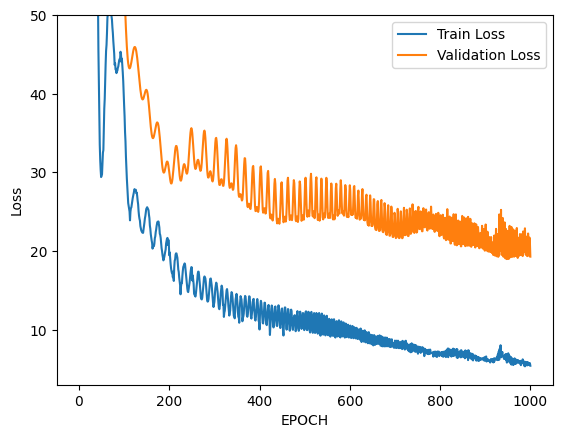

In [61]:
## train loss, valid loss 의 epoch 별 변화의 흐름 시각화.
plt.plot(range(1, N_EPOCH+1), train_loss_list, label="Train Loss")
plt.plot(range(1, N_EPOCH+1), valid_loss_list, label="Validation Loss")

plt.xlabel("EPOCH")
plt.ylabel("Loss")
# plt.ylim(3, 50)
plt.legend()
plt.show()

In [62]:
train_loss_list[-1] ** (1/2), valid_loss_list[-1]**(1/2)

(2.326683314909665, 4.391697219848517)

# 모델 저장

## 모델 전체 저장 및 불러오기
- 모델구조, 파라미터 저장


In [63]:
save_path = "models/boston_model.pth"
torch.save(boston_model, save_path)

In [65]:
load_boston_model = torch.load(save_path)
torchinfo.summary(load_boston_model, (200, 13))

Layer (type:depth-idx)                   Output Shape              Param #
BostonModel                              [200, 1]                  --
├─Linear: 1-1                            [200, 32]                 448
├─Linear: 1-2                            [200, 16]                 528
├─Linear: 1-3                            [200, 1]                  17
Total params: 993
Trainable params: 993
Non-trainable params: 0
Total mult-adds (M): 0.20
Input size (MB): 0.01
Forward/backward pass size (MB): 0.08
Params size (MB): 0.00
Estimated Total Size (MB): 0.09

In [78]:
# 예측 서비스
new_X = torch.cat([boston_testset[0][0], boston_testset[1][0]])
new_X = new_X.reshape(-1, 13)
new_X.shape  #[2: 데이터수, 13: feature수]

torch.Size([2, 13])

In [74]:
boston_testset[0][0]  # 첫번째 데이터 => X, y
boston_testset[1][0]
torch.cat([boston_testset[0][0], boston_testset[1][0]]).reshape(-1, 13)

tensor([-0.4084, -0.4996, -1.1287, -0.2729, -0.8334,  0.0450, -1.8462,  0.6951,
        -0.6246,  0.1591, -0.7127,  0.1855, -0.7361])

In [79]:
pred_new = load_boston_model(new_X)
print(pred_new)

tensor([[22.7247],
        [24.4805]], grad_fn=<AddmmBackward0>)


In [80]:
boston_testset[0][1], boston_testset[1][1]

(tensor([22.6000]), tensor([50.]))

In [82]:
loss_fn(pred_new[1], boston_testset[1][1])

tensor(651.2448, grad_fn=<MseLossBackward0>)

## state_dict 저장 및 로딩
- 모델 파라미터만 저장

In [91]:
save_path2 = "models/boston_model_statedict.pth"
# 모델에서 state_dict를 조회
model_sd = boston_model.state_dict()
torch.save(model_sd, save_path2)

In [90]:
# type(model_sd), model_sd.keys()
# model_sd['lr1.weight'].shape
# model_sd['lr1.weight'][0]

tensor([-2.0362,  1.3646, -1.2309,  1.9352, -2.1697,  2.2205, -1.7415, -1.4992,
        -0.6139, -2.1902, -2.1760,  1.8528, -2.3148])

In [93]:
# 불러오기
## state_dict를 불러오기
load_sd = torch.load(save_path2)  
type(load_sd)
## 새로운 모델을 생성한 뒤에 파라미터를 변경.
new_model = BostonModel()
new_model.load_state_dict(load_sd)

<All keys matched successfully>

In [94]:
pred_new2 = new_model(new_X)
pred_new2

tensor([[22.7247],
        [24.4805]], grad_fn=<AddmmBackward0>)

# 분류 (Classification)
- 예측할 값이 정해져 있는 경우. ==> 범주형인 경우.
- 다중분류
    - 범주값(class)가 여러인 경우
- 이진분류
    - 범주값: 0/1 => 맞는지 틀린지를 추정 문제. 
    - 맞는것: Posivitve -> 1
    - 틀린것: Negative -> 0

## Fashion MNIST Dataset - 다중분류(Multi-Class Classification) 문제

10개의 범주(category)와 70,000개의 흑백 이미지로 구성된 [패션 MNIST](https://github.com/zalandoresearch/fashion-mnist) 데이터셋. 
이미지는 해상도(28x28 픽셀)가 낮고 다음처럼 개별 의류 품목을 나타낸다:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>그림</b> <a href="https://github.com/zalandoresearch/fashion-mnist">패션-MNIST 샘플</a> (Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

이미지는 28x28 크기이며 Gray scale이다. *레이블*(label)은 0에서 9까지의 정수 배열이다. 아래 표는 이미지에 있는 의류의 **클래스**(class)들이다.

<table>
  <tr>
    <th>레이블</th>
    <th>클래스</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trousers</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

import torchinfo

device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cpu


In [2]:
### Dataset, DataLoader 생성
#### Built in Dataset
fmnist_trainset = datasets.FashionMNIST(root="datasets", train=True, download=True,
                                       transform=transforms.ToTensor())
fmnist_testset = datasets.FashionMNIST(root="datasets", train=False, download=True,
                                      transform=transforms.ToTensor())


In [3]:
# 데이터개수
print("train 개수:", len(fmnist_trainset))
print("test 개수:", len(fmnist_testset))

train 개수: 60000
test 개수: 10000


In [4]:
print(fmnist_trainset)
print()
print(fmnist_testset)

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: datasets
    Split: Train
    StandardTransform
Transform: ToTensor()

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: datasets
    Split: Test
    StandardTransform
Transform: ToTensor()


In [ ]:
p = model(data)

In [5]:
# index to class 
index_to_class = np.array(fmnist_trainset.classes) # fany indexing을 위해서 list->ndarray
index_to_class[[1, 1, 2, 3, 0]]

array(['Trouser', 'Trouser', 'Pullover', 'Dress', 'T-shirt/top'],
      dtype='<U11')

In [6]:
# class to index
class_to_index = fmnist_trainset.class_to_idx
class_to_index

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

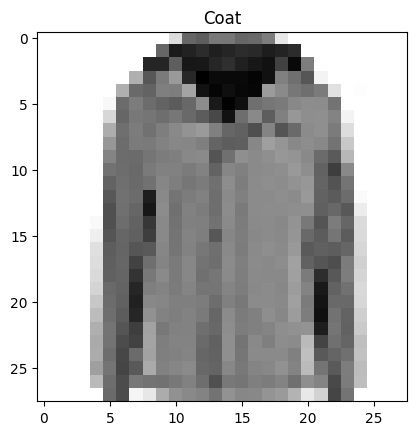

In [11]:
# 이미지 확인
idx = 11500
x, y = fmnist_trainset[idx]  # Dataset[i] : (X, y)
plt.imshow(x[0], cmap='Greys')  # x: (channel: 1, height, width)
plt.title(index_to_class[y])
plt.show()

In [12]:
### DataLoader
fmnist_trainloader = DataLoader(fmnist_trainset, batch_size=128, shuffle=True,
                                drop_last=True)
fmnist_testloader = DataLoader(fmnist_testset, batch_size=128)

In [14]:
len(fmnist_trainloader), len(fmnist_testloader)  # epoch당 step수

(468, 79)

In [15]:
### 모델 정의
class FashionMNISTModel(nn.Module):
    
    def __init__(self):
        super().__init__()
        # 입력 이미지를 받아서 처리후 리턴
        self.lr1 = nn.Linear(28*28, 2048) # 784  -> 2048
        self.lr2 = nn.Linear(2048, 1024)  # 2048 -> 1024
        self.lr3 = nn.Linear(1024, 512)   # 1024 ->  512
        self.lr4 = nn.Linear(512, 256)    # 512  ->  256
        self.lr5 = nn.Linear(256, 128)    # 256  ->  128
        self.lr6 = nn.Linear(128, 64)     # 128  ->   64
        # output - out_features: 다중분류- class 개수 (fashion mnist: 10)
        self.lr7 = nn.Linear(64, 10)  # 각 클래스별 확률이 출력되도록 한다.
    def forward(self, X):
        #  X: (batch, channel, height, width) ====> (batch, channel*height*width)
#         out = torch.flatten(X, start_dim=1)
        out = nn.Flatten()(X)
        # lr1  ~ lr7
        ## forward 처리를 구현. => Linear -> ReLU() (lr7의 출력은 ReLU에 넣지 마세요.)
        out = nn.ReLU()(self.lr1(out))
        out = nn.ReLU()(self.lr2(out))
        out = nn.ReLU()(self.lr3(out))
        out = nn.ReLU()(self.lr4(out))
        out = nn.ReLU()(self.lr5(out))
        out = nn.ReLU()(self.lr6(out))
        ### output
        out = self.lr7(out)
        return out

In [16]:
## 모델 생성 및 확인
f_model = FashionMNISTModel()
print(f_model)

FashionMNISTModel(
  (lr1): Linear(in_features=784, out_features=2048, bias=True)
  (lr2): Linear(in_features=2048, out_features=1024, bias=True)
  (lr3): Linear(in_features=1024, out_features=512, bias=True)
  (lr4): Linear(in_features=512, out_features=256, bias=True)
  (lr5): Linear(in_features=256, out_features=128, bias=True)
  (lr6): Linear(in_features=128, out_features=64, bias=True)
  (lr7): Linear(in_features=64, out_features=10, bias=True)
)


In [17]:
torchinfo.summary(f_model, (128, 1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
FashionMNISTModel                        [128, 10]                 --
├─Linear: 1-1                            [128, 2048]               1,607,680
├─Linear: 1-2                            [128, 1024]               2,098,176
├─Linear: 1-3                            [128, 512]                524,800
├─Linear: 1-4                            [128, 256]                131,328
├─Linear: 1-5                            [128, 128]                32,896
├─Linear: 1-6                            [128, 64]                 8,256
├─Linear: 1-7                            [128, 10]                 650
Total params: 4,403,786
Trainable params: 4,403,786
Non-trainable params: 0
Total mult-adds (M): 563.68
Input size (MB): 0.40
Forward/backward pass size (MB): 4.14
Params size (MB): 17.62
Estimated Total Size (MB): 22.16

In [131]:
### 모델 추정결과 형태를 확인
i = torch.ones((2, 1, 28, 28))  # 1 x 28 x 28 이미지 2장
y_hat = f_model(i)
y_hat[0]  # 첫번째 이미지에대한 추론결과

tensor([ 0.0382,  0.0802, -0.1152,  0.0955, -0.0201,  0.0386, -0.0091, -0.0076,
         0.0581,  0.0474], grad_fn=<SelectBackward0>)

In [144]:
y_hat[0].shape
# 정답 class => 예측결과 10중에서 가장 큰값이 있는 index
y_hat.argmax(axis=-1)  # 첫번째: 3, 두번째: 3
index_to_class[y_hat.detach().numpy().argmax(axis=-1)]
# requires_grad=True인 Tensor를 ndarray로 변환할 때는 
## tensor.detach() 를 한 다음 변환해야 한다.

array(['Dress', 'Dress'], dtype='<U11')

In [152]:
# y_hat => 확률값으로 변환 ===> Softmax()
y_hat_probability = nn.Softmax(dim=-1)(y_hat)
y_hat_probability#.sum(dim=-1)
# 정답의 확률, 정답 라벨
y_hat_probability.max(dim=-1).values, y_hat_probability.argmax(dim=-1)

(tensor([0.1076, 0.1076], grad_fn=<MaxBackward0>), tensor([3, 3]))

In [21]:
a, b = next(iter(fmnist_trainloader))
b

tensor([0, 0, 2, 9, 9, 9, 9, 0, 5, 9, 2, 6, 0, 2, 6, 1, 5, 5, 6, 6, 0, 5, 0, 9,
        2, 0, 5, 7, 1, 5, 2, 3, 8, 1, 6, 1, 0, 6, 3, 9, 3, 1, 9, 9, 1, 1, 5, 1,
        6, 8, 2, 3, 4, 9, 3, 1, 1, 4, 8, 6, 5, 6, 2, 1, 6, 2, 4, 4, 4, 3, 7, 1,
        4, 6, 7, 4, 9, 0, 0, 8, 0, 7, 8, 0, 8, 7, 2, 0, 9, 7, 2, 5, 8, 1, 4, 9,
        5, 5, 2, 8, 3, 5, 3, 6, 4, 3, 3, 9, 0, 4, 7, 9, 6, 7, 7, 7, 3, 5, 4, 2,
        9, 5, 5, 1, 0, 7, 3, 1])

In [23]:
c = f_model(a.to(device))

In [26]:
c.shape

torch.Size([128, 10])

In [34]:
d = c.argmax(-1)
d

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1])

In [33]:
torch.sum(b == d)/128

tensor(0.1172)

In [18]:
#### 학습(Train)
## 하이퍼파라미터
LR = 0.001
N_EPOCH = 20

# 모델을 device 로 이동.
f_model = f_model.to(device)
# loss fn -> 다중분류: nn.CrossEntropyLoss() ==> 다중 분류용 Log loss 
loss_fn = nn.CrossEntropyLoss()
# optimizer
optimizer = torch.optim.Adam(f_model.parameters(), lr=LR)

In [47]:
# train
import time
## 각 에폭별 학습이 끝나고 모델 평가한 값을 저장.
train_loss_list = []
valid_loss_list = []
valid_acc_list = []   # test set의 정확도 검증 결과 => 전체데이터 중 맞은데이터의 개수

s = time.time()
for epoch in range(N_EPOCH):
    ######### train
    f_model.train()
    train_loss = 0.0 # 현재 epoch의 tain set의 loss
    for X_train, y_train in fmnist_trainloader:
        # 1. device로 옮기기. model과 같은 device로 옮긴다.
        X_train, y_train = X_train.to(device), y_train.to(device)
        # 2. 예측 - 순전파
        pred_train = f_model(X_train)
        # 3. Loss 계산
        loss = loss_fn(pred_train, y_train) # (예측, 정답)
        # 4 모델 파라미터 업데이트
        ## 4-1 gradient 초기화
        optimizer.zero_grad()
        ## 4-2 grad 계산 - (오차) 역전파
        loss.backward()
        ## 4-3 파라미터 업데이트
        optimizer.step()
        
        # train loss를 누적
        train_loss += loss.item()
    # 1에폭 학습 종료 => train_loss의 평균을 list에 저장.
    train_loss /= len(fmnist_trainloader)  # 누적_train_loss/step수
    train_loss_list.append(train_loss)
    
    ######### validation
    f_model.eval()
    valid_loss = 0.0  # 현재 epoch의 validation loss 저장할 변수
    valid_acc = 0.0   # 현재 epoch의 validation accuracy(정확도)를 저장할 변수
    ### 정확도: 맞은것의 개수 / 전체 개수
    with torch.no_grad(): # 도함수 구할 필요가 없으므로 no grad context manager에서 실행.
        for X_valid, y_valid in fmnist_testloader:
            # 1. device로 옮기기
            X_valid, y_valid = X_valid.to(device), y_valid.to(device)
            
            # 2. 예측
            pred_valid = f_model(X_valid) # class별 정답일 가능성을 출력 (batch, 10)
            pred_label = pred_valid.argmax(dim=-1) # 정답 class를 조회. (pred_valid에서 가장 큰값을 가진 index)
            
            # 3. 평가
            ## 3.1 loss 계산
            loss_valid = loss_fn(pred_valid, y_valid) ## loss_fn() batch만큼 평균을 계산.
            valid_loss += loss_valid.item()
            ## 3.2 정확도 계산
            valid_acc += torch.sum(pred_label == y_valid).item()
        # 한 epoch에 대한 평가 완료 => valid_loss_list, valid_acc_list에 추가
        valid_loss /= len(fmnist_testloader)        # step수로 나눠서 평균을 계산
        valid_acc /= len(fmnist_testloader.dataset) # testset의 총 데이터 개수로 나눔.
        valid_loss_list.append(valid_loss)
        valid_acc_list.append(valid_acc)
        
        print(f"[{epoch+1:02d}/{N_EPOCH}] train loss: {train_loss} valid loss: {valid_loss} valid acc: {valid_acc}")
    
    
    
e = time.time()

[01/20] train loss: 0.15759624657818141 valid loss: 0.3811964841583107 valid acc: 0.8985


In [36]:
print(f"걸린시간: {e-s}초")

걸린시간: 724.6633155345917초


In [42]:
valid_loss_list = [v.item() for v in valid_loss_list]
valid_loss_list

[0.5012025237083435,
 0.4390244781970978,
 0.4064876139163971,
 0.3639106750488281,
 0.3725932538509369,
 0.35287195444107056,
 0.3404465317726135,
 0.33981508016586304,
 0.33494001626968384,
 0.33171260356903076,
 0.3399675488471985,
 0.3234052360057831,
 0.3317050635814667,
 0.3545818030834198,
 0.3590960204601288,
 0.3160719871520996,
 0.3673509955406189,
 0.3594995439052582,
 0.35006678104400635,
 0.3596830666065216]

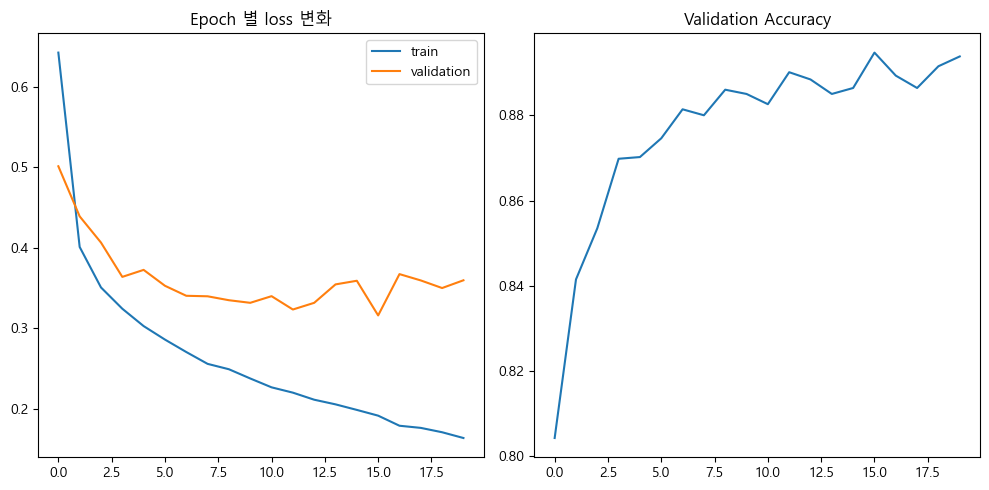

In [45]:
# 결과 시각화
plt.rcParams["font.family"] = "Malgun gothic"

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss_list, label="train")
plt.plot(valid_loss_list, label="validation")
plt.title("Epoch 별 loss 변화")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(valid_acc_list)
plt.title("Validation Accuracy")

plt.tight_layout()
plt.show()

In [46]:
#################################################################################
# 모델 학습이 진행되면 어느 시점부터 성능이 떨어지기 시작
#   (trainset으로 검증한 결과는 계속 좋아지는데 
#     validation set으로 검증한 결과는 성능이 좋아지다 안좋아진다.)
# 1. 학습 도중 성능 개선될 때마다 저장. (가장 좋은 성능의 모델을 서비스 할 수 있게한다.)
# 2. 더이상 성능개선이 안되면 학습을 중지(조기종료)
##################################################################################

In [49]:
import time

LR = 0.001
N_EPOCH = 1000

# 모델을 device 로 이동.
f_model = FashionMNISTModel()
f_model = f_model.to(device)
# loss fn -> 다중분류: nn.CrossEntropyLoss() ==> 다중 분류용 Log loss 
loss_fn = nn.CrossEntropyLoss()
# optimizer
optimizer = torch.optim.Adam(f_model.parameters(), lr=LR)

########################################
# 조기종료 + 모델 저장을 위한 변수 추가
########################################
###### 모델 저장을 위한변수
# 학습 중 가장 좋은 성능 평가지표를 저장. 현 epoch의 지표가 이 변수값보다 좋으면 저장
# 평가지표: validation loss
best_score = torch.inf  
save_model_path = "models/fashion_mnist_best_model.pth"

###### 조기 종료를 위한 변수: 특정 epoch동안 성능 개선이 없으면 학습을 중단
patience = 5 # 성능이 개선 될지를 기다릴 epoch 수. patience 번 만큼 개선이 안되면 중단.(보통 10이상 지정)
trigger_cnt = 0 # 성능 개선을 몇번 째 기다리는 지 정할 변수. patience==trigger_cnt : 중단

# train

## 각 에폭별 학습이 끝나고 모델 평가한 값을 저장.
train_loss_list = []
valid_loss_list = []
valid_acc_list = []   # test set의 정확도 검증 결과 => 전체데이터 중 맞은데이터의 개수

s = time.time()
for epoch in range(N_EPOCH):
    ######### train
    f_model.train()
    train_loss = 0.0 # 현재 epoch의 tain set의 loss
    for X_train, y_train in fmnist_trainloader:
        # 1. device로 옮기기. model과 같은 device로 옮긴다.
        X_train, y_train = X_train.to(device), y_train.to(device)
        # 2. 예측 - 순전파
        pred_train = f_model(X_train)
        # 3. Loss 계산
        loss = loss_fn(pred_train, y_train) # (예측, 정답)
        # 4 모델 파라미터 업데이트
        ## 4-1 gradient 초기화
        optimizer.zero_grad()
        ## 4-2 grad 계산 - (오차) 역전파
        loss.backward()
        ## 4-3 파라미터 업데이트
        optimizer.step()
        
        # train loss를 누적
        train_loss += loss.item()
    # 1에폭 학습 종료 => train_loss의 평균을 list에 저장.
    train_loss /= len(fmnist_trainloader)  # 누적_train_loss/step수
    train_loss_list.append(train_loss)
    
    ######### validation
    f_model.eval()
    valid_loss = 0.0  # 현재 epoch의 validation loss 저장할 변수
    valid_acc = 0.0   # 현재 epoch의 validation accuracy(정확도)를 저장할 변수
    ### 정확도: 맞은것의 개수 / 전체 개수
    with torch.no_grad(): # 도함수 구할 필요가 없으므로 no grad context manager에서 실행.
        for X_valid, y_valid in fmnist_testloader:
            # 1. device로 옮기기
            X_valid, y_valid = X_valid.to(device), y_valid.to(device)
            
            # 2. 예측
            pred_valid = f_model(X_valid) # class별 정답일 가능성을 출력 (batch, 10)
            pred_label = pred_valid.argmax(dim=-1) # 정답 class를 조회. (pred_valid에서 가장 큰값을 가진 index)
            
            # 3. 평가
            ## 3.1 loss 계산
            loss_valid = loss_fn(pred_valid, y_valid) ## loss_fn() batch만큼 평균을 계산.
            valid_loss += loss_valid.item()
            ## 3.2 정확도 계산
            valid_acc += torch.sum(pred_label == y_valid).item()
        # 한 epoch에 대한 평가 완료 => valid_loss_list, valid_acc_list에 추가
        valid_loss /= len(fmnist_testloader)        # step수로 나눠서 평균을 계산
        valid_acc /= len(fmnist_testloader.dataset) # testset의 총 데이터 개수로 나눔.
        valid_loss_list.append(valid_loss)
        valid_acc_list.append(valid_acc)
        
        print(f"[{epoch+1:02d}/{N_EPOCH}] train loss: {train_loss} valid loss: {valid_loss} valid acc: {valid_acc}")
        
    ##################################
    # 조기종료여부, 모델 저장 처리
    #   저장: 현 epoch valid_loss 가 best_score 보다 개선된 경우 저장(작으면 개선)
    #################################
    if valid_loss < best_score: # 성능이 개선된 경우.
        #저장 로그 출력
        print(f"====> 모델저장:  {epoch+1} Epoch - 이전 valid_loss: {best_score}, 현재 valid_loss: {valid_loss}")
        # best_score교체
        best_score = valid_loss
        # 저장
        torch.save(f_model, save_model_path)
        # trigger_cnt 를 0으로 초기화
        trigger_cnt = 0
    else: # 성능개선이 안된경우.
        # trigger_cnt를 1 증가
        trigger_cnt += 1
        if patience == trigger_cnt: # patience 만큼 대기 ==> 조기 종료
            #로그
            print(f"=====> {epoch+1} Epoch에서 조기종료-{best_score}에서 개선 안됨")
            break
    
e = time.time()

[01/1000] train loss: 0.6355121705012444 valid loss: 0.4740014958985244 valid acc: 0.8321
모델저장:  1 Epoch - 이전 valid_loss: inf,               현재 valid_loss: 0.4740014958985244
[02/1000] train loss: 0.39493234506529623 valid loss: 0.4090986514016043 valid acc: 0.8548
모델저장:  2 Epoch - 이전 valid_loss: 0.4740014958985244,               현재 valid_loss: 0.4090986514016043
[03/1000] train loss: 0.3558846613089753 valid loss: 0.3680261739447147 valid acc: 0.8652
모델저장:  3 Epoch - 이전 valid_loss: 0.4090986514016043,               현재 valid_loss: 0.3680261739447147
[04/1000] train loss: 0.3206319821695996 valid loss: 0.37015241158159473 valid acc: 0.8662
[05/1000] train loss: 0.3044445222705348 valid loss: 0.34685571208784854 valid acc: 0.8757
모델저장:  5 Epoch - 이전 valid_loss: 0.3680261739447147,               현재 valid_loss: 0.34685571208784854
[06/1000] train loss: 0.28472161668742824 valid loss: 0.320456976188889 valid acc: 0.883
모델저장:  6 Epoch - 이전 valid_loss: 0.34685571208784854,               현재 va

In [50]:
### 저장된 모델 로딩
best_model = torch.load(save_model_path)

In [51]:
#### test_dataloader 로 평가
best_model = best_model.to(device)
best_model.eval()
valid_loss = 0.0  # 현재 epoch의 validation loss 저장할 변수
valid_acc = 0.0   # 현재 epoch의 validation accuracy(정확도)를 저장할 변수
### 정확도: 맞은것의 개수 / 전체 개수
with torch.no_grad(): # 도함수 구할 필요가 없으므로 no grad context manager에서 실행.
    for X_valid, y_valid in fmnist_testloader:
        # 1. device로 옮기기
        X_valid, y_valid = X_valid.to(device), y_valid.to(device)

        # 2. 예측
        pred_valid = best_model(X_valid) # class별 정답일 가능성을 출력 (batch, 10)
        pred_label = pred_valid.argmax(dim=-1) # 정답 class를 조회. (pred_valid에서 가장 큰값을 가진 index)

        # 3. 평가
        ## 3.1 loss 계산
        loss_valid = loss_fn(pred_valid, y_valid) ## loss_fn() batch만큼 평균을 계산.
        valid_loss += loss_valid.item()
        ## 3.2 정확도 계산
        valid_acc += torch.sum(pred_label == y_valid).item()
    # 한 epoch에 대한 평가 완료 => valid_loss_list, valid_acc_list에 추가
    valid_loss /= len(fmnist_testloader)        # step수로 나눠서 평균을 계산
    valid_acc /= len(fmnist_testloader.dataset) # testset의 총 데이터 개수로 나눔

In [52]:
valid_loss

0.320456976188889

In [53]:
valid_acc

0.883

## 위스콘신 유방암 데이터셋 - 이진분류(Binary Classification) 문제

- **이진 분류 문제 처리 모델의 두가지 방법**
    1. positive(1)일 확률을 출력하도록 구현
        - output layer: units=1, activation='sigmoid'
        - loss: binary_crossentropy
    2. negative(0)일 확률과 positive(1)일 확률을 출력하도록 구현 => 다중분류 처리 방식으로 해결
        - output layer: units=2, activation='softmax', y(정답)은 one hot encoding 처리
        - loss: categorical_crossentropy
        
- 위스콘신 대학교에서 제공한 종양의 악성/양성여부 분류를 위한 데이터셋
- Feature
    - 종양에 대한 다양한 측정값들
- Target의 class
    - 0 - malignant(악성종양)
    - 1 - benign(양성종양)

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

import numpy as np
import matplotlib.pyplot as plt

In [5]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

### Dataset, DataLoader  생성

In [8]:
X, y = load_breast_cancer(return_X_y=True)
print(type(X), type(y))
print(X.shape, y.shape)
print(np.unique(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(569, 30) (569,)
[0 1]


In [9]:
index_to_class = np.array(["악성", "양성"])
class_to_index = dict(악성=0, 양성=1)

In [10]:
# y shape을 2차원으로 변경 ==> 모델 출력 shape과 맞춰준다.
# (batch_size, 1)
y = y.reshape(-1, 1)
y.shape

(569, 1)

In [11]:
### train / test set 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, # 나눌 대상 X, y
                                                    test_size=0.25, # 나눌 비율
                                                    stratify=y # class 별 비율을 맞춰서 나눔.
                                                   )

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(426, 30) (143, 30) (426, 1) (143, 1)


In [12]:
#### 전처리 - Feature Scaling (컬럼들의 scale(척도)를 맞춘다.)
# StandardScaler => 평균: 0, 표준편차: 1 을 기준으로 맞춤.
scaler = StandardScaler()
# scaler.fit(X_train)
# X_train_scaled = scaler.transform(X_train)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # TrainSet으로 fit한 scaler를 이용해 변환.

In [13]:
#### ndarry => Tensor 변환 ==> Dataset을 구성 ====> DataLoader 구성
# ndarray => torch.Tensor
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)

y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

In [16]:
# Dataset 생성 ==> 메모리의 Tensor를 Dataset으로 생성=>TensorDataset
trainset = TensorDataset(X_train_tensor, y_train_tensor)
testset = TensorDataset(X_test_tensor, y_test_tensor)

# DataLoader
train_loader = DataLoader(trainset, batch_size=200, shuffle=True, drop_last=True)
test_loader = DataLoader(testset, batch_size=len(testset))

### Model 클래스 정의

In [17]:
X_train.shape

(426, 30)

In [47]:
class BCModel(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.lr1 = nn.Linear(30, 32)
        self.lr2 = nn.Linear(32, 8)
        # 출력 Layer: 이진분류 - positive의 확률 값 한개를 출력. out_features=1
        self.lr3 = nn.Linear(8, 1)
        
    def forward(self, X):
        # X (입력) shape: (batchsize, 30)
#         out = self.lr1(X)
#         out = nn.ReLU()(out)
        out = nn.ReLU()(self.lr1(X))
        out = nn.ReLU()(self.lr2(out))
        # 이진분류 출력값 처리 -> Linear()는 한개의 값을 출력 => 확률값으로 변경.==> Sigmoid/Logistic 함수를 Activation 함수로 사용
        out = self.lr3(out)
        out = nn.Sigmoid()(out)
        return out

In [48]:
model = BCModel()
tmp_x = torch.ones(5, 30)
print(tmp_x.shape)
tmp_y = model(tmp_x)
tmp_y
# 0.4755 -> 1(양성-positive)일 확률

torch.Size([5, 30])


tensor([[0.5260],
        [0.5260],
        [0.5260],
        [0.5260],
        [0.5260]], grad_fn=<SigmoidBackward0>)

In [51]:
# Tensor객체.type(타입을지정) ==> Tensor 데이터타입 변한.
# bool -> int : False: 0, True: 1
(tmp_y > 0.5).type(torch.int32)

tensor([[1],
        [1],
        [1],
        [1],
        [1]], dtype=torch.int32)

### Train(학습/훈련)

In [59]:
import time
## 하이퍼파라미터
LR = 0.001
N_EPOCH = 1000

# 모델 생성
model = BCModel().to(device)
# loss 함수
loss_fn = nn.BCELoss() # binary cross entropy loss
# optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

s = time.time()
######################### 
# 에폭별 검증 -> train loss, validation loss, validation accuracy
# 조기종료(Early Stopping) - 성능 개선이 안되면 학습을 중단
# 가장 좋은 성능을 내는 에폭의 모델을 저장. 
#  조기종료/모델 저장 ==> validation loss 기준.
######################### 

## 결과 저장할 리스트
train_loss_list, valid_loss_list, valid_acc_list = [], [], []

### 모델 저장, 조기종료 관련 변수
best_score = torch.inf  # valid loss
save_bcmodel_path = "models/bc_best_model.pth"

patience = 20  # 성능이 개선 될때 까지 몇 에폭 기다릴 것인지.
trigger_cnt = 0 # 성능이 개선 될때 까지 현재 몇번째 기다렸는지.


for epoch in range(N_EPOCH):
    
    # train
    model.train()
    train_loss = 0.0
    for X_train, y_train in train_loader:
        # 한 step
        X_train, y_train = X_train.to(device), y_train.to(device)
        pred_train = model(X_train) # 예측
        loss = loss_fn(pred_train, y_train) # 오차계산
        # 파라미터 업데이트
        optimizer.zero_grad() # 초기화
        loss.backward() # grad 계산
        optimizer.step() # 파라미터 update
        
        train_loss += loss.item()
    train_loss /= len(train_loader) # 현재 epoch의 평균 train loss 계산
    
    #### 검증(validation)
    model.eval()
    valid_loss, valid_acc = 0.0, 0.0
    with torch.no_grad():
        for X_valid, y_valid in test_loader:
            X_valid, y_valid = X_valid.to(device), y_valid.to(device)
            pred_valid = model(X_valid) # 값: 1개 - positive일 확률 ==> Loss 계산
            pred_label = (pred_valid > 0.5).type(torch.int32)  # label ==> 정확도 계산
            
            # loss
            loss_valid = loss_fn(pred_valid, y_valid)
            valid_loss += loss_valid.item()
            # 정확도
            valid_acc += torch.sum(pred_label == y_valid).item()
    # valid 검증 결과 계산
    valid_loss /= len(test_loader)
    valid_acc /= len(test_loader.dataset)
    
    print(f"[{epoch+1}/{N_EPOCH}] train loss: {train_loss}, valid loss: {valid_loss}, valid accuracy: {valid_acc}")
    train_loss_list.append(train_loss)
    valid_loss_list.append(valid_loss)
    valid_acc_list.append(valid_acc)
    
    ##### 모델 저장 및 조기종료 처리
    if valid_loss < best_score: # 성능 개선
        print(f"===> {epoch+1}에폭에서 모델 저장. 이전 score: {best_score}, 현재 score: {valid_loss}")
        torch.save(model, save_bcmodel_path)
        best_score = valid_loss
        trigger_cnt = 0
    else: # 성능개선이 안됨.
        trigger_cnt += 1
        if patience == trigger_cnt: # 조기종료
            print(f"######## Early Stop: {epoch+1}")
            break
    
    
e = time.time()
print(f"학습시간: {e-s}초")

[1/1000] train loss: 0.6600761711597443, valid loss: 0.6541908383369446, valid accuracy: 0.6293706293706294
===> 1에폭에서 모델 저장. 이전 score: inf, 현재 score: 0.6541908383369446
[2/1000] train loss: 0.6508070826530457, valid loss: 0.6489077210426331, valid accuracy: 0.6293706293706294
===> 2에폭에서 모델 저장. 이전 score: 0.6541908383369446, 현재 score: 0.6489077210426331
[3/1000] train loss: 0.6499413549900055, valid loss: 0.6433717012405396, valid accuracy: 0.6293706293706294
===> 3에폭에서 모델 저장. 이전 score: 0.6489077210426331, 현재 score: 0.6433717012405396
[4/1000] train loss: 0.6422750055789948, valid loss: 0.6375226378440857, valid accuracy: 0.6293706293706294
===> 4에폭에서 모델 저장. 이전 score: 0.6433717012405396, 현재 score: 0.6375226378440857
[5/1000] train loss: 0.6378816366195679, valid loss: 0.6312955021858215, valid accuracy: 0.6293706293706294
===> 5에폭에서 모델 저장. 이전 score: 0.6375226378440857, 현재 score: 0.6312955021858215
[6/1000] train loss: 0.6275888681411743, valid loss: 0.6247140765190125, valid accuracy: 0

[60/1000] train loss: 0.10956179723143578, valid loss: 0.10988839715719223, valid accuracy: 0.972027972027972
===> 60에폭에서 모델 저장. 이전 score: 0.11212968081235886, 현재 score: 0.10988839715719223
[61/1000] train loss: 0.108187735080719, valid loss: 0.1078074648976326, valid accuracy: 0.972027972027972
===> 61에폭에서 모델 저장. 이전 score: 0.10988839715719223, 현재 score: 0.1078074648976326
[62/1000] train loss: 0.10696880146861076, valid loss: 0.10583995282649994, valid accuracy: 0.972027972027972
===> 62에폭에서 모델 저장. 이전 score: 0.1078074648976326, 현재 score: 0.10583995282649994
[63/1000] train loss: 0.10341939330101013, valid loss: 0.10400591790676117, valid accuracy: 0.965034965034965
===> 63에폭에서 모델 저장. 이전 score: 0.10583995282649994, 현재 score: 0.10400591790676117
[64/1000] train loss: 0.0985913947224617, valid loss: 0.10225709527730942, valid accuracy: 0.965034965034965
===> 64에폭에서 모델 저장. 이전 score: 0.10400591790676117, 현재 score: 0.10225709527730942
[65/1000] train loss: 0.09446350485086441, valid loss: 0

[116/1000] train loss: 0.046778575517237186, valid loss: 0.07063715159893036, valid accuracy: 0.9790209790209791
===> 116에폭에서 모델 저장. 이전 score: 0.07087991386651993, 현재 score: 0.07063715159893036
[117/1000] train loss: 0.057493824511766434, valid loss: 0.07035258412361145, valid accuracy: 0.9790209790209791
===> 117에폭에서 모델 저장. 이전 score: 0.07063715159893036, 현재 score: 0.07035258412361145
[118/1000] train loss: 0.05726117268204689, valid loss: 0.07007354497909546, valid accuracy: 0.9790209790209791
===> 118에폭에서 모델 저장. 이전 score: 0.07035258412361145, 현재 score: 0.07007354497909546
[119/1000] train loss: 0.058145297691226006, valid loss: 0.06988619267940521, valid accuracy: 0.9790209790209791
===> 119에폭에서 모델 저장. 이전 score: 0.07007354497909546, 현재 score: 0.06988619267940521
[120/1000] train loss: 0.057365886867046356, valid loss: 0.0696156844496727, valid accuracy: 0.9790209790209791
===> 120에폭에서 모델 저장. 이전 score: 0.06988619267940521, 현재 score: 0.0696156844496727
[121/1000] train loss: 0.04758299

[166/1000] train loss: 0.044717926532030106, valid loss: 0.06447076052427292, valid accuracy: 0.9790209790209791
===> 166에폭에서 모델 저장. 이전 score: 0.06457599252462387, 현재 score: 0.06447076052427292
[167/1000] train loss: 0.04486469738185406, valid loss: 0.06435530632734299, valid accuracy: 0.9790209790209791
===> 167에폭에서 모델 저장. 이전 score: 0.06447076052427292, 현재 score: 0.06435530632734299
[168/1000] train loss: 0.03468093741685152, valid loss: 0.06417442858219147, valid accuracy: 0.9790209790209791
===> 168에폭에서 모델 저장. 이전 score: 0.06435530632734299, 현재 score: 0.06417442858219147
[169/1000] train loss: 0.04327096603810787, valid loss: 0.06405695527791977, valid accuracy: 0.9790209790209791
===> 169에폭에서 모델 저장. 이전 score: 0.06417442858219147, 현재 score: 0.06405695527791977
[170/1000] train loss: 0.04204528033733368, valid loss: 0.06395886838436127, valid accuracy: 0.9790209790209791
===> 170에폭에서 모델 저장. 이전 score: 0.06405695527791977, 현재 score: 0.06395886838436127
[171/1000] train loss: 0.043618902

[243/1000] train loss: 0.029594553634524345, valid loss: 0.06034664437174797, valid accuracy: 0.9790209790209791
[244/1000] train loss: 0.022281893528997898, valid loss: 0.06021306291222572, valid accuracy: 0.9790209790209791
[245/1000] train loss: 0.028992301784455776, valid loss: 0.06012563779950142, valid accuracy: 0.9790209790209791
[246/1000] train loss: 0.028134018182754517, valid loss: 0.060048628598451614, valid accuracy: 0.9790209790209791
[247/1000] train loss: 0.028253629803657532, valid loss: 0.06009237840771675, valid accuracy: 0.9790209790209791
[248/1000] train loss: 0.028160125017166138, valid loss: 0.060161035507917404, valid accuracy: 0.9790209790209791
######## Early Stop: 248
학습시간: 1.9967560768127441초


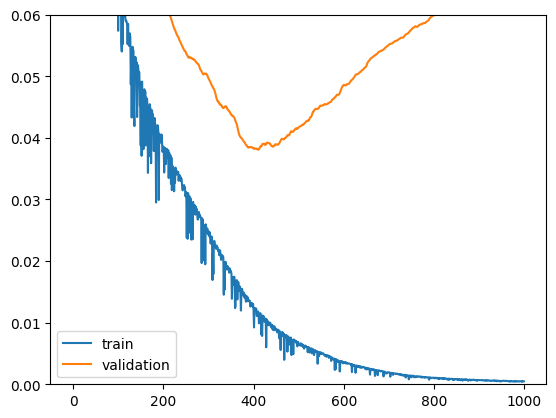

In [58]:
plt.plot(train_loss_list, label="train")
plt.plot(valid_loss_list, label="validation")
plt.ylim(0, 0.06)
plt.legend()
plt.show()

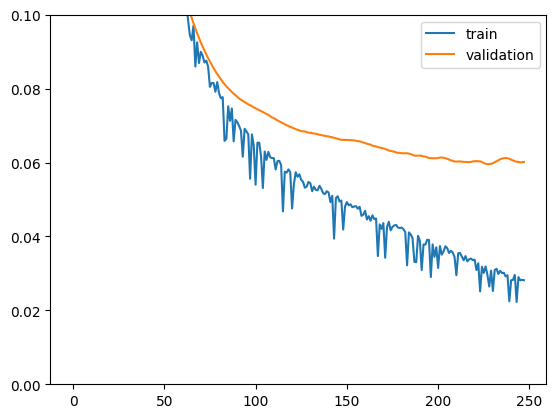

In [61]:
plt.plot(train_loss_list, label="train")
plt.plot(valid_loss_list, label="validation")
plt.ylim(0, 0.1)
plt.legend()
plt.show()

### 모델 Train 결과 확인/평가

In [62]:
best_model = torch.load(save_bcmodel_path)

In [ ]:
# 모델이 학습한 데이터는 전처리 된 것.(Standard Scaling)
# 예측(추론) 할 데이터도 같은 전처리를 해야한다.

In [63]:
X_test_tensor.shape

torch.Size([143, 30])

In [66]:
pred_new = best_model(X_test_tensor)
pred_new.shape

torch.Size([143, 1])

In [68]:
pred_new[:5]  # positive(1)일 확률

tensor([[9.9998e-01],
        [9.9998e-01],
        [1.0429e-05],
        [9.9850e-01],
        [9.9959e-01]], grad_fn=<SliceBackward0>)

In [69]:
# 확률->class index
pred_new_label = (pred_new > 0.5).type(torch.int32)
pred_new_label[:5]

tensor([[1],
        [1],
        [0],
        [1],
        [1]], dtype=torch.int32)

In [71]:
y_test_tensor[:5]

tensor([[1.],
        [1.],
        [0.],
        [1.],
        [1.]])